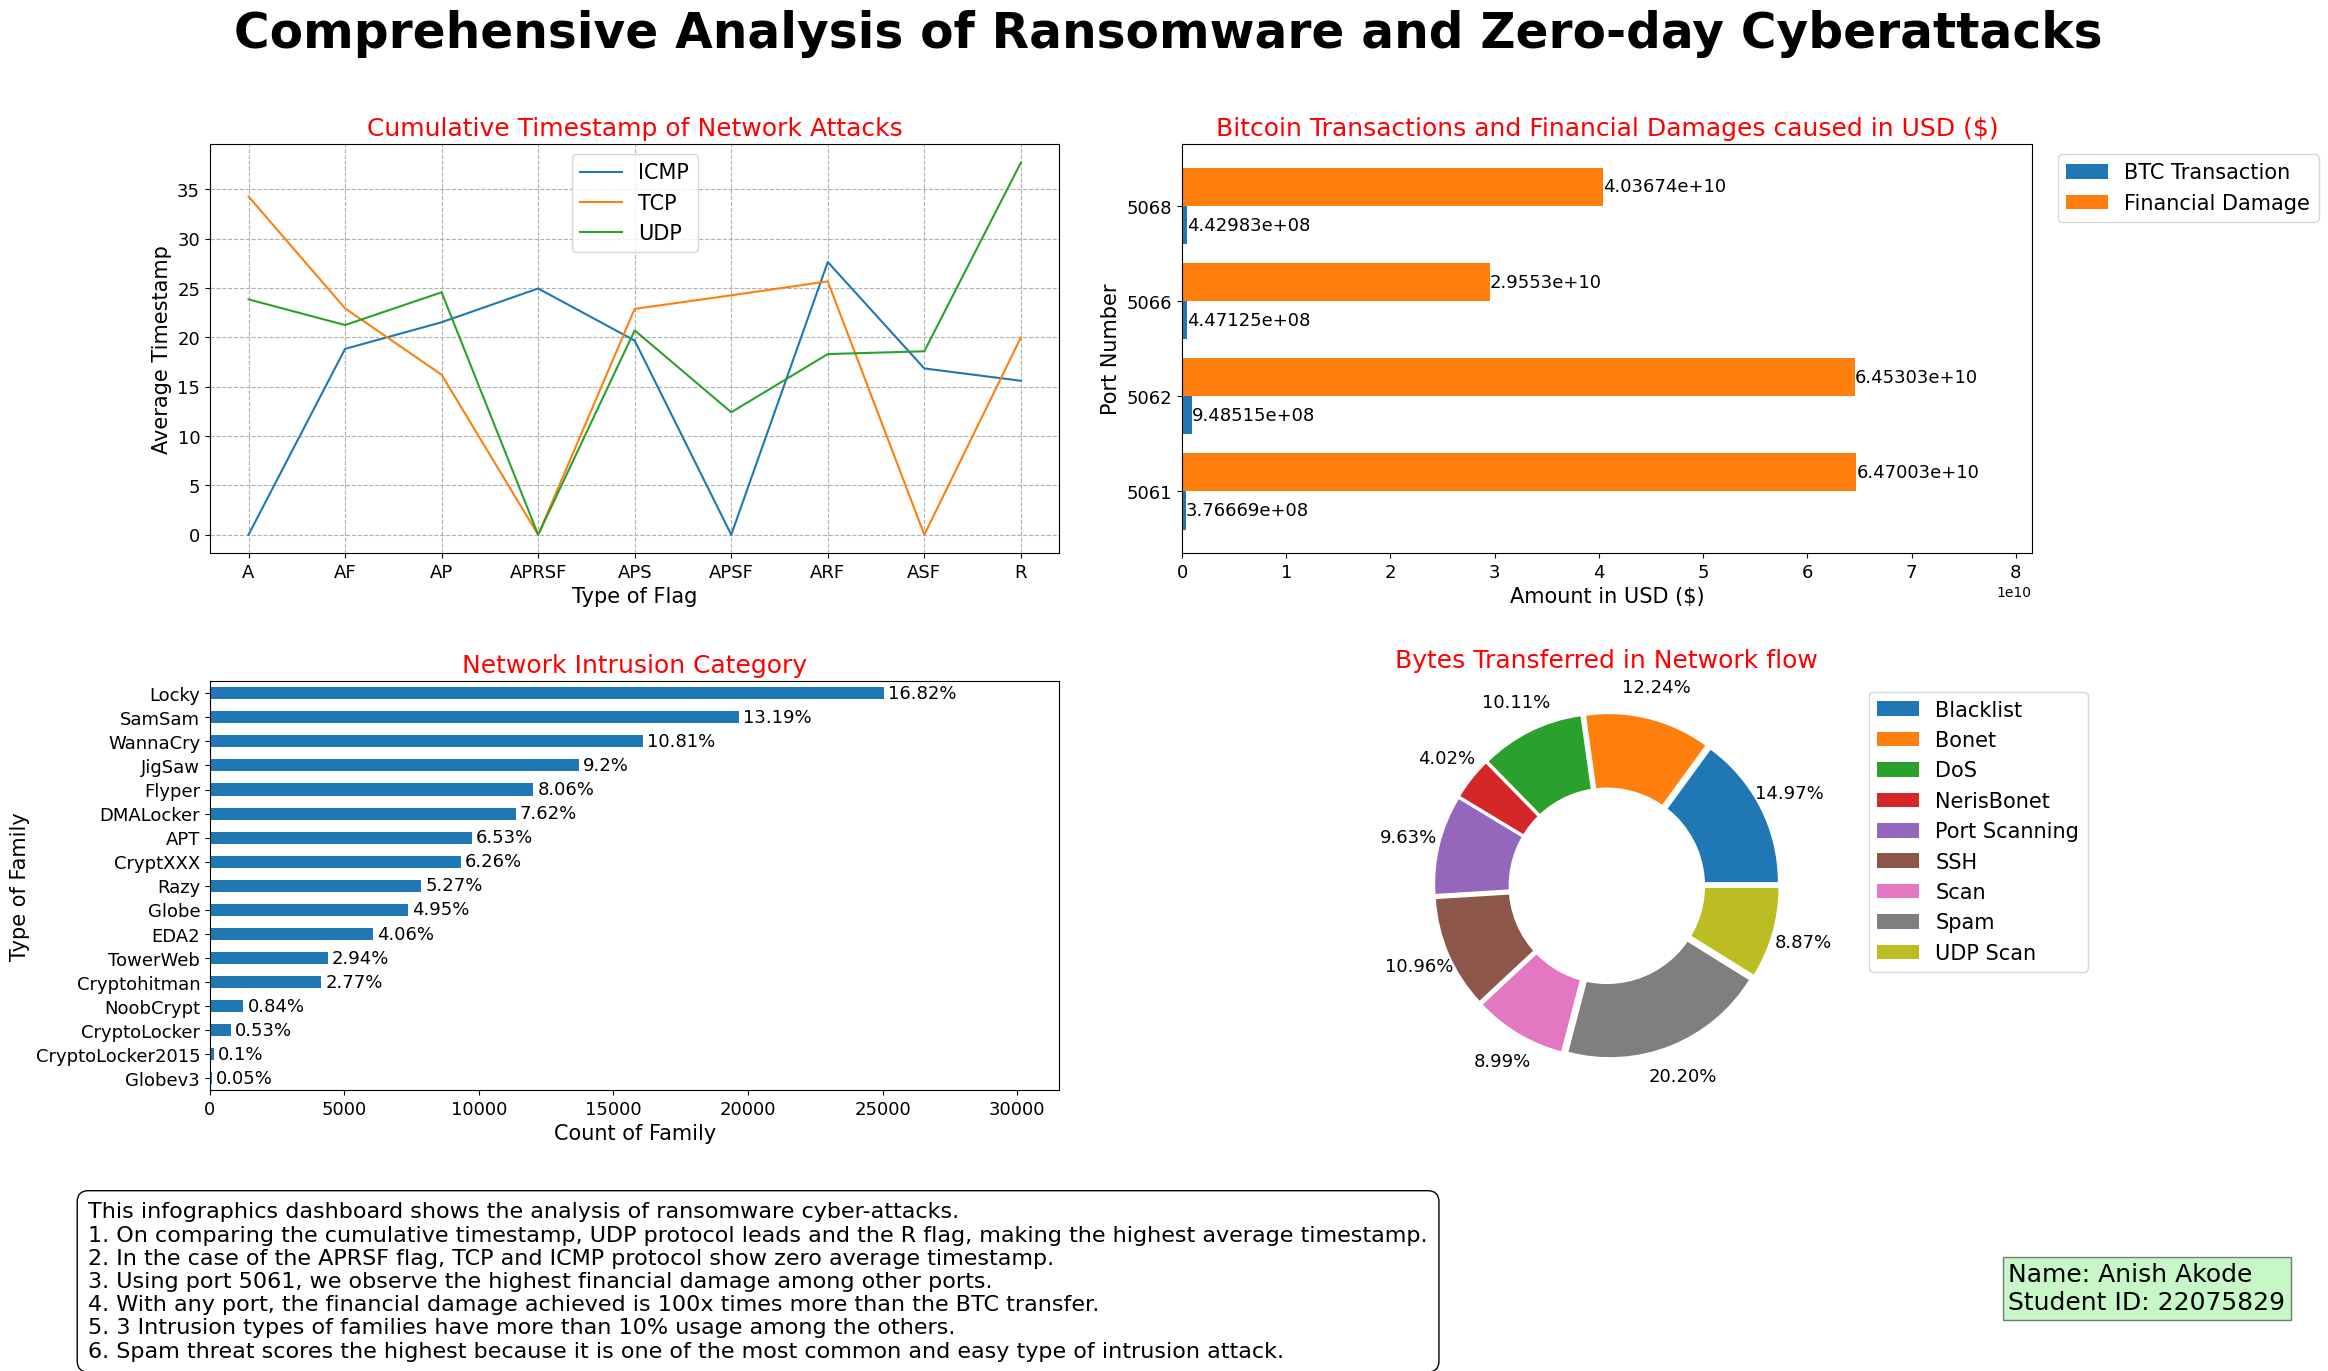

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def read_data(file_path):
    '''
    This is a function which takes the filename (data) as the input and returns
    a dataframe having the data.
    '''
    # Read the data as array using numpy
    data = pd.read_csv(file_path)

    # Return the data
    return data

def infograph(data):
    '''
    This is a function which takes the dataset and produces a inforgraph having
    4 plots and some understanding gained from the plots.
    '''
    # Intialization of the figure
    fig, ax = plt.subplots(2, 2, figsize=(24, 12))
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.3)

    # Plot1: Cumulative Timestamp of Network Attacks
    # Plotting on the first subplot (ax1)
    ax1 = plt.subplot(2, 2, 1)

    # Get the data for plotting
    network_df = data.pivot_table(values='Time', index='Flag',
                                  columns='Protcol', aggfunc='mean')
    network_df.fillna(0, inplace=True)

    # Calling the plot function to plot line graph
    network_df.plot(kind='line', ax=ax1)

    # Display grid
    ax1.grid(linestyle='--')

    # Define the plot title
    ax1.set_title("Cumulative Timestamp of Network Attacks", c='red',
                  fontsize=18)

    # Axes labelling
    ax1.set_xlabel("Type of Flag", fontsize=15)
    ax1.set_ylabel("Average Timestamp", fontsize=15)

    # Define ticks parameters
    ax1.tick_params(axis='both', labelsize=13)

    # To display legend
    ax1.legend(fontsize=15)

    # Plot2: Bitcoin Transactions and Financial Damages caused in USD ($)
    # Plotting on the second subplot (ax2)
    ax2 = plt.subplot(2, 2, 2)

    # Get the data for plotting
    sub_df = data[['Port', 'BTC', 'USD']]
    sub_grouped = sub_df.groupby('Port').sum()
    sub_grouped['BTC (USD)'] = sub_grouped['BTC']*43731.50
    sub_grouped.drop('BTC', axis=1, inplace=True)

    # Calling the plot function to plot barh graph
    barh = sub_grouped.plot(kind='barh', width=0.8, ax=ax2)

    # Displaying values over the bars
    for container in barh.containers:
        barh.bar_label(container, fontsize=13)

    # Set the x-axis limits
    min_value = ax2.get_xlim()[0]
    max_value = ax2.get_xlim()[1]
    ax2.set_xlim(min_value*1.2, max_value*1.2)

    # Define the plot title
    ax2_title = "Bitcoin Transactions and Financial Damages caused in USD ($)"
    ax2.set_title(ax2_title, c="red", fontsize=18)

    # Axes labelling
    ax2.set_xlabel("Amount in USD ($)", fontsize=15)
    ax2.set_ylabel("Port Number", fontsize=15)

    # Define ticks parameters
    ax2.tick_params(axis='both', labelsize=13)

    # To display legend
    ax2.legend(["BTC Transaction", "Financial Damage"],
               loc='upper right', bbox_to_anchor=(1.35, 1.0), fontsize=15)

    # Plot3: Cumulative Timestamp of Network Attacks
    # Plotting on the third subplot (ax3)
    ax3 = plt.subplot(2, 2, 3)

    # Get the data for plotting
    family_counts = data['Family'].value_counts().sort_values()

    # Calling the plot function to plot barh graph
    barplot = family_counts.plot.barh(family_counts.index, family_counts,
                                      ax=ax3)

    # Set the bar labels
    label_values = (family_counts/sum(family_counts)*100).round(2)
    bars = barplot.containers[0]
    barplot.bar_label(container=bars,
                      labels=[f"{a}%" for a in label_values], padding=3,
                      fontsize=13)

    # Set the x-axis limits
    min_value = ax3.get_xlim()[0]
    max_value = ax3.get_xlim()[1]
    ax3.set_xlim(min_value*1.2, max_value*1.2)

    # Define the plot title
    ax3.set_title("Network Intrusion Category", c="red", fontsize=18)

    # Axes labelling
    ax3.set_xlabel("Count of Family", fontsize=15)
    ax3.set_ylabel("Type of Family", fontsize=15)

    # Define ticks parameters
    ax3.tick_params(axis='both', labelsize=13)

    # Plot4: Comprehensive Analysis of Ransomware and Zero-day Cyberattacks
    # Plotting on the forth subplot (ax4)
    ax4 = plt.subplot(2, 2, 4)

    # Get the data for plotting
    grouped = data.groupby('Threats')['Netflow_Bytes'].sum().reset_index()
    grouped.set_index('Threats', inplace=True)

    # Calling the plot function to plot pie graph
    grouped['Netflow_Bytes'].plot(kind='pie', autopct='%.2f%%', labels=None,
                                  pctdistance=1.2, explode=[0.05]*len(grouped),
                                  ax=ax4, fontsize=13)

    # Create a white circle for donut pie
    centre_circle = plt.Circle((0, 0), 0.60, fc='white')
    ax4.add_artist(centre_circle)

    # Define the plot title
    ax4.set_title("Bytes Transferred in Network flow", pad=10, c="red",
                  fontsize=18)

    # Axes labelling
    ax4.set_ylabel("")

    # To display legend
    ax4.legend(labels=grouped.index, loc='upper right',
               bbox_to_anchor=(1.7, 1.0), fontsize=15)

    # Define the title text and display it
    title_text = 'Comprehensive Analysis of Ransomware and Zero-day '\
        'Cyberattacks'
    plt.suptitle(title_text, fontsize=35, fontweight='bold', ha='center')

    # Define the insights
    insights = ("This infographics dashboard shows the analysis of ransomware "
                "cyber-attacks.\n"
                "1. On comparing the cumulative timestamp, UDP protocol leads "
                "and the R flag, making the highest average timestamp.\n"
                "2. In the case of the APRSF flag, TCP and ICMP protocol show "
                "zero average timestamp.\n"
                "3. Using port 5061, we observe the highest financial damage "
                "among other ports.\n"
                "4. With any port, the financial damage achieved is 100x times"
                " more than the BTC transfer.\n"
                "5. 3 Intrusion types of families have more than 10% usage "
                "among the others.\n"
                "6. Spam threat scores the highest because it is one of the "
                "most common and easy type of intrusion attack.")

    # Display insights in the figure
    plt.figtext(0.05, -0.08, insights, fontsize=16,
                verticalalignment='center', horizontalalignment='left',
                bbox=dict(boxstyle="round,pad=0.5", facecolor='white',
                          edgecolor='black'))

    # Display Student name and ID
    plt.figtext(0.85, -0.1, 'Name: Anish Akode\nStudent ID: 22075829',
                fontsize=18, bbox=dict(facecolor='lightgreen', alpha=0.5),
                wrap=True, horizontalalignment='left')

    # Adjust layout and display
    plt.tight_layout(pad=3.0)

    # Save figure as png
    # plt.savefig("22075829.png", dpi=300, bbox_inches='tight', pad_inches=0.5)

    # Display plot
    plt.show()

# Get the data by calling the read_data method
data = read_data("ugransome.csv")

# Calling the pdf_plot method to plot the distribution
infograph(data)